## Alizamiento Exponencial con darts(Data Analytics and Real-Time Systems) 

Es un paquete que tiene una variedad de modelos para la predicción con Series de Tiempo.  Estos modelos incluyen varias variantes de ARIMA, Prophet, Alizamiento Exponencial, y varios modelos de aprendizaje profundo como LSTMs y GRUs.  darts también tiene métodos integrados para hacer validación cruzada, afinamiento de hiper-parámetros, e ingeniería de características (feature engineering).

Una de las características claves de darts es la habilidad de trabajar con predicciones probabilísticas.  Esto quiere decir que en vez de simplemente generar una predicción única para cada paso en el tiempo, darts puede generart una distribución de posibilidades, permitiendo una comprensión mayor de la incertidumbre en las predicciones.

### Trabajarémos un ejemplo de Alizamiento Exponencial

In [5]:
%pip install darts

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [8]:
datos = pd.read_csv("AirPassengers.csv", delimiter=",")
datos.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
datos.tail()

,Month,AirPassengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


### Conversión de DataFrame a una Serie

In [10]:
serie = TimeSeries.from_dataframe(datos, "Month", "AirPassengers")
serie

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object 'AirPassengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### División en dos partes:  entreno y validación (o prueba)

Apartarémos los últimos 36 meses para validación

In [11]:
entreno, validacion = serie[:-36], serie[-36:]

### Instanciar un modelo de la clase ExponentialSmoothing

In [12]:
modelo = ExponentialSmoothing()

### Entrenamiento con la serie para entrenamiento

In [13]:
modelo.fit(entreno)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

### Predicción con la serie para validación

In [14]:
prediccion = modelo.predict(len(validacion), num_samples = 1000)

### Graficamos con Matplotlib

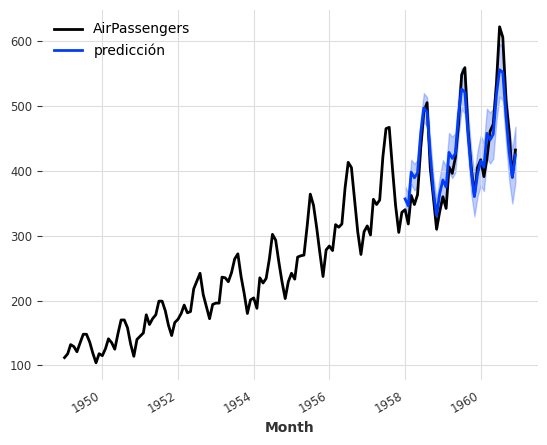

In [15]:
serie.plot()
prediccion.plot(label = "predicción", low_quantile = 0.05, high_quantile = 0.95)
plt.legend()